In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import pymc3 as pm

In [2]:
# import scipy.io

In [3]:
path = 'datos/'
fileName = 'SAOCOM_Chubut_C3_TesisNaty_agrupadas.csv'

In [4]:
rho_lenga = 930 # [kg/m3] Nothofagus pumilio
rho_nire = 1035 # [kg/m3] Nothofagus antarctica

In [5]:

# C11 = mat['C11mn']#, 'C11std', 
# C12 = 1j*mat['C12imn'] + mat['C12rmn'], #'C12istd','C12rstd', 
# C13 = 1j*mat['C13imn'] + mat['C13rmn'], #'C13istd', 'C13rstd', 
# C22 = mat['C22mn'] #'C22std', 
# C23 = 1j*mat['C23imn'] + mat['C23rmn'], # 'C23istd',  'C23rstd', 
# C33 = mat['C33mn'] #, 'C33std'
# C21 = np.conjugate(C12)
# C31 = np.conjugate(C13)
# C32 = np.conjugate(C23)
# C = np.asarray([[C11, C12, C12], [C21, C22, C23], [C31, C32, C33]])

In [6]:
data = pd.read_csv(path+fileName, encoding='latin', delimiter = '\t')

In [7]:
data.head()

,NAME,FECHA,LAYER,TIPO_FORES,SUP_m2,ALT_DOM,AB,VOL_m3/ha,C11,C12r,...,C11_std,C12r_std,C12i_std,C13r_std,C13i_std,C22_std,C23r_std,C23i_std,C33_std,ang_std
0,CENTRO13,2018/11/26,parcela 13_14,ÑIRE,200,5.3,8.0,26.0,0.160690,-0.030487,...,0.017024,0.002728,0.011799,0.021984,0.001017,0.003474,0.001133,0.004629,0.054383,0.609491
1,CENTRO14,2018/11/26,parcela 13_14,ÑIRE,200,4.2,11.0,30.0,0.053432,-0.003363,...,0.023910,0.005859,0.002906,0.017584,0.003344,0.014411,0.006088,0.003618,0.012555,0.540004
2,CENTRO16,2018/11/27,parcela 15_16,ÑIRE,200,4.0,9.0,22.0,0.078208,0.004938,...,0.017168,0.012798,0.018943,0.017214,0.009697,0.018431,0.006218,0.010161,0.010213,0.927212
3,CENTRO15,2018/11/27,parcela 15_16,ÑIRE,200,4.6,7.0,21.0,0.208326,0.009212,...,0.043887,0.005325,0.009817,0.020155,0.004918,0.007495,0.003289,0.003134,0.016891,1.826952
4,CENTRO17,2019/01/21,parcela 17_18,ÑIRE,200,4.0,20.0,58.0,0.083482,0.009273,...,0.001442,0.008058,0.001537,0.002375,0.004799,0.003681,0.007246,0.000313,0.001304,0.044877


In [8]:
data.columns

Index(['NAME', 'FECHA', 'LAYER', 'TIPO_FORES', 'SUP_m2', 'ALT_DOM', 'AB',
       'VOL_m3/ha', 'C11', 'C12r', 'C12i', 'C13r', 'C13i', 'C22', 'C23r',
       'C23i', 'C33', 'ang', 'C11_std', 'C12r_std', 'C12i_std', 'C13r_std',
       'C13i_std', 'C22_std', 'C23r_std', 'C23i_std', 'C33_std', 'ang_std'],
      dtype='object')

In [9]:
# calculo biomasa
data['AGB'] = data['VOL_m3/ha']*rho_nire/1000

In [10]:
# 'corrijo' por angulo de incidencia
# data['C11'] = data['C11']*np.cos(40*np.pi/180)/np.cos(data['ang']*np.pi/180)
# data['C22'] = data['C22']*np.cos(40*np.pi/180)/np.cos(data['ang']*np.pi/180)
# data['C33'] = data['C33']*np.cos(40*np.pi/180)/np.cos(data['ang']*np.pi/180)

# data['C11_std'] = data['C11_std']*np.cos(40*np.pi/180)/np.cos(data['ang']*np.pi/180)
# data['C22_std'] = data['C22_std']*np.cos(40*np.pi/180)/np.cos(data['ang']*np.pi/180)
# data['C33_std'] = data['C33_std']*np.cos(40*np.pi/180)/np.cos(data['ang']*np.pi/180)

# paso a dB 
data['C11_dB'] = 10*np.log10(data.C11)
data['C22_dB'] = 10*np.log10(data.C22)
data['C33_dB'] = 10*np.log10(data.C33)

In [11]:
data.head()

,NAME,FECHA,LAYER,TIPO_FORES,SUP_m2,ALT_DOM,AB,VOL_m3/ha,C11,C12r,...,C13i_std,C22_std,C23r_std,C23i_std,C33_std,ang_std,AGB,C11_dB,C22_dB,C33_dB
0,CENTRO13,2018/11/26,parcela 13_14,ÑIRE,200,5.3,8.0,26.0,0.160690,-0.030487,...,0.001017,0.003474,0.001133,0.004629,0.054383,0.609491,26.910,-7.940102,-12.253854,-7.847607
1,CENTRO14,2018/11/26,parcela 13_14,ÑIRE,200,4.2,11.0,30.0,0.053432,-0.003363,...,0.003344,0.014411,0.006088,0.003618,0.012555,0.540004,31.050,-12.721955,-12.613200,-12.726153
2,CENTRO16,2018/11/27,parcela 15_16,ÑIRE,200,4.0,9.0,22.0,0.078208,0.004938,...,0.009697,0.018431,0.006218,0.010161,0.010213,0.927212,22.770,-11.067515,-9.377825,-9.812287
3,CENTRO15,2018/11/27,parcela 15_16,ÑIRE,200,4.6,7.0,21.0,0.208326,0.009212,...,0.004918,0.007495,0.003289,0.003134,0.016891,1.826952,21.735,-6.812573,-10.485892,-7.758320
4,CENTRO17,2019/01/21,parcela 17_18,ÑIRE,200,4.0,20.0,58.0,0.083482,0.009273,...,0.004799,0.003681,0.007246,0.000313,0.001304,0.044877,60.030,-10.784058,-11.543184,-12.725827


In [12]:
# genero dataframe ordenado por biomasa
data_AGB = data.sort_values('AGB')

In [13]:
data_AGB.head()

,NAME,FECHA,LAYER,TIPO_FORES,SUP_m2,ALT_DOM,AB,VOL_m3/ha,C11,C12r,...,C13i_std,C22_std,C23r_std,C23i_std,C33_std,ang_std,AGB,C11_dB,C22_dB,C33_dB
33,CENTRO42,2019/04/11,parcela 41_42,ÑIRE,200,1.5,2.0,1.0,0.067381,0.010798,...,0.003443,0.002080,0.004121,0.003308,0.009594,0.236777,1.035,-11.714616,-12.774916,-11.516676
36,CENTRO48,2019/02/18,parcela 47_48,ÑIRE,200,2.9,7.0,1.0,0.099669,0.005818,...,0.038984,0.021980,0.004482,0.002241,0.048502,0.517312,1.035,-10.014420,-14.185715,-9.895139
41,CENTRO49,2019/03/15,parcela 49_50,ÑIRE,200,4.6,2.0,6.0,1.342594,-0.333859,...,0.215542,0.194537,0.248929,0.084299,0.048056,0.517457,6.210,1.279448,-3.585839,-0.913734
42,CENTRO51,2019/03/16,parcela 51_52,ÑIRE,200,3.3,3.0,7.0,0.253838,0.007772,...,0.008889,0.048263,0.002233,0.025338,0.043310,0.098793,7.245,-5.954441,-5.736525,-4.225634
37,CENTRO47,2019/02/18,parcela 47_48,ÑIRE,200,3.0,3.0,7.0,0.104014,0.009574,...,0.008776,0.012811,0.018249,0.004546,0.006697,0.789516,7.245,-9.829088,-12.959775,-9.824706


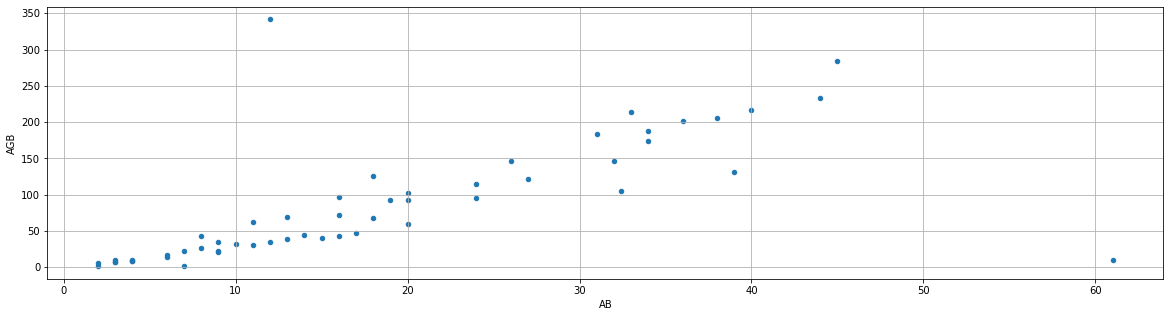

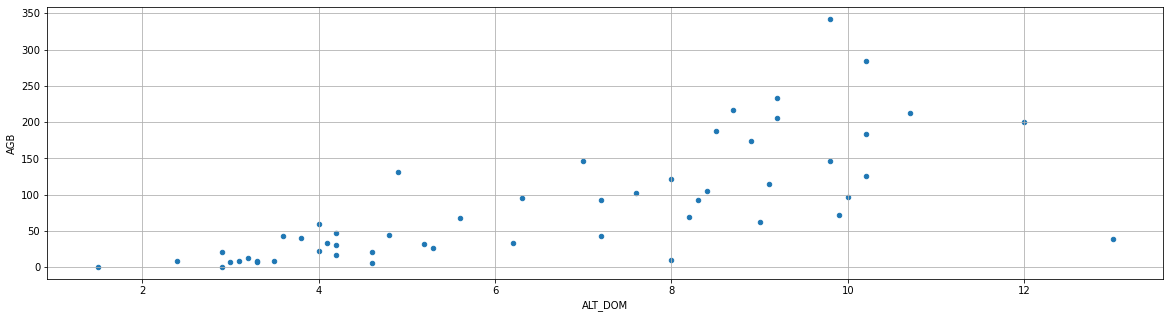

In [14]:
# correlacion entre parametros
ax1 = data_AGB.plot.scatter(x='AB',y='AGB', figsize=(20, 5), grid=True) #, c='ALT_DOM'
ax1 = data_AGB.plot.scatter(x='ALT_DOM',y='AGB', figsize=(20, 5), grid=True) #, c='ALT_DOM'

In [15]:
# estudio error
from matplotlib.pyplot import figure

# figure(figsize=(20, 6), dpi=80)

# C11_yerr_pos = np.abs(data_AGB['C11_dB'] - 10*np.log10(data_AGB['C11'] + data_AGB['C11_std']))
# C11_yerr_neg = np.abs(data_AGB['C11_dB'] - 10*np.log10(data_AGB['C11'] - data_AGB['C11_std']))

# # C11_yerr_pos = 1*np.ones(data_AGB.C11.shape)
# # C11_yerr_neg = 5*np.ones(data_AGB.C11.shape)

# plt.errorbar(data_AGB['NAME'], data_AGB['C11_dB'], yerr=(C11_yerr_neg, C11_yerr_pos))
# # plt.xticks(rotation=90)
# # plt.plot(data_AGB['NAME'], data_AGB['C11_dB'])
# # plt.plot(data_AGB['NAME'], C11_yerr_pos)
# plt.xticks(rotation=90)

In [16]:
# barras de error
C11_yerr_pos = np.abs(data_AGB['C11_dB'] - 10*np.log10(data_AGB['C11'] + data_AGB['C11_std']))
C11_yerr_neg = np.abs(data_AGB['C11_dB'] - 10*np.log10(data_AGB['C11'] - data_AGB['C11_std']))

C22_yerr_pos = np.abs(data_AGB['C22_dB'] - 10*np.log10(data_AGB['C22'] + data_AGB['C22_std']))
C22_yerr_neg = np.abs(data_AGB['C22_dB'] - 10*np.log10(data_AGB['C22'] - data_AGB['C22_std']))

C33_yerr_pos = np.abs(data_AGB['C33_dB'] - 10*np.log10(data_AGB['C33'] + data_AGB['C33_std']))
C33_yerr_neg = np.abs(data_AGB['C33_dB'] - 10*np.log10(data_AGB['C33'] - data_AGB['C33_std']))

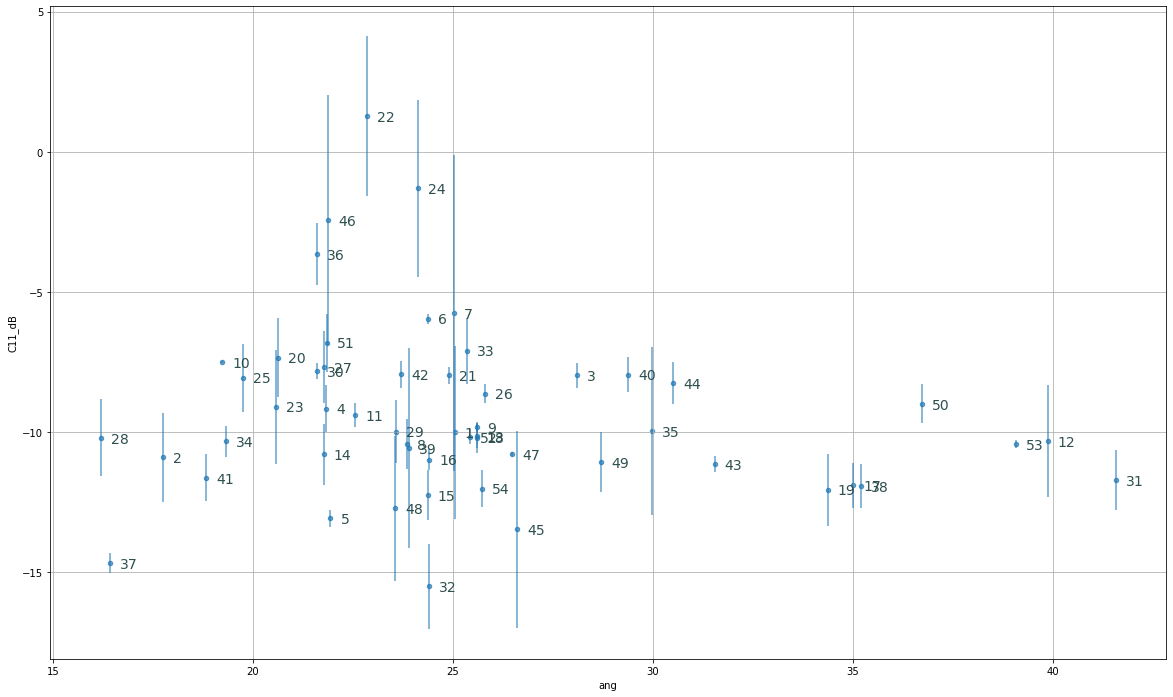

In [17]:
# Estudio C vs angulo

ax = data_AGB.plot.scatter(x='ang',y='C11_dB', yerr=(C11_yerr_neg, C11_yerr_pos), alpha=0.7, figsize=(20, 12), grid=True)

for i, txt in enumerate(data_AGB.NAME):
   striped = txt.split('O')[1]
   ax.annotate(striped, (data_AGB.ang[i], data_AGB.C11_dB[i]), xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=14, color='darkslategrey')  

# ax = data_AGB.plot.scatter(x='ang',y='C22_dB', yerr=(C22_yerr_neg, C22_yerr_pos), alpha=0.7, figsize=(20, 12), grid=True)
# ax = data_AGB.plot.scatter(x='ang',y='C33_dB', yerr=(C33_yerr_neg, C33_yerr_pos), alpha=0.7, figsize=(20, 12), grid=True)

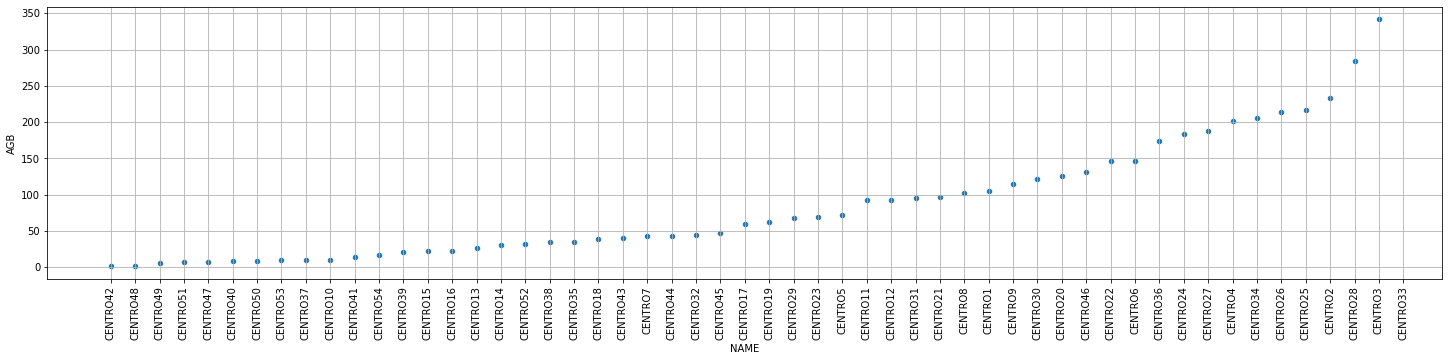

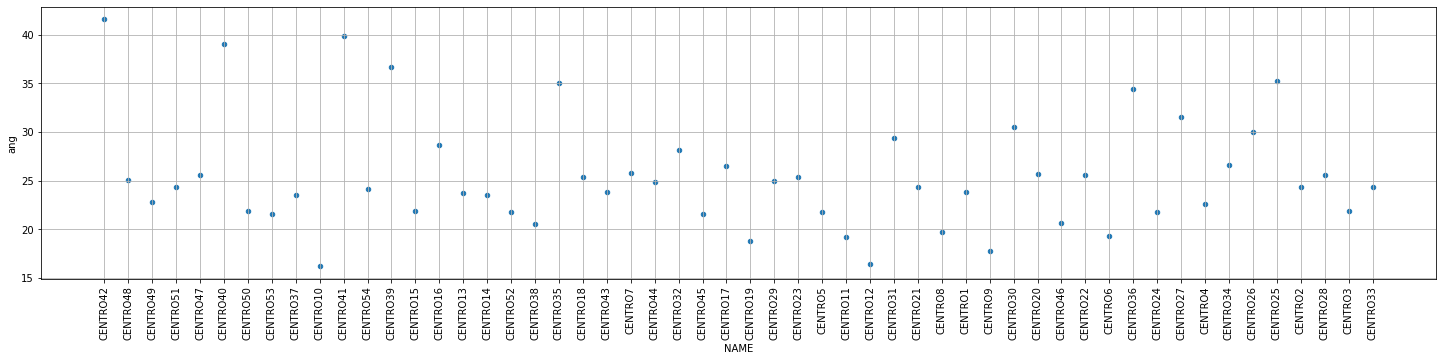

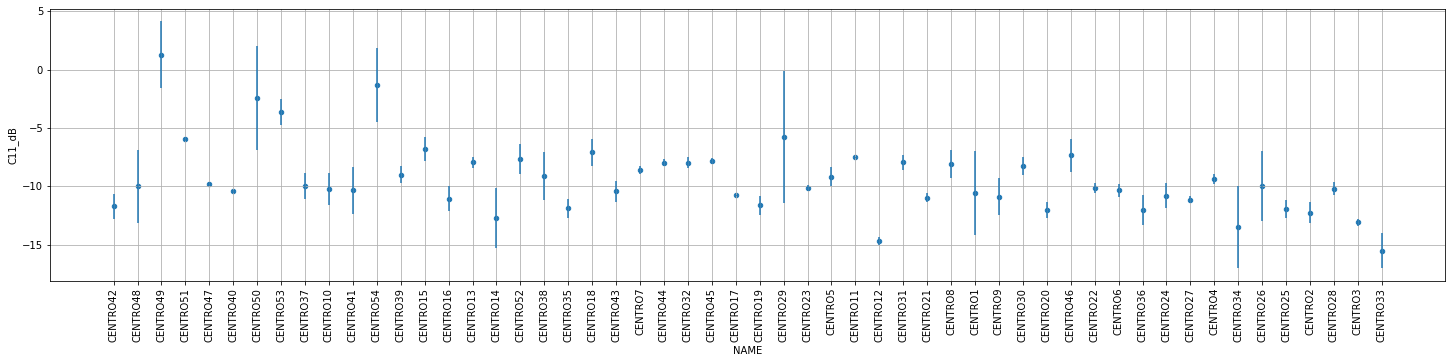

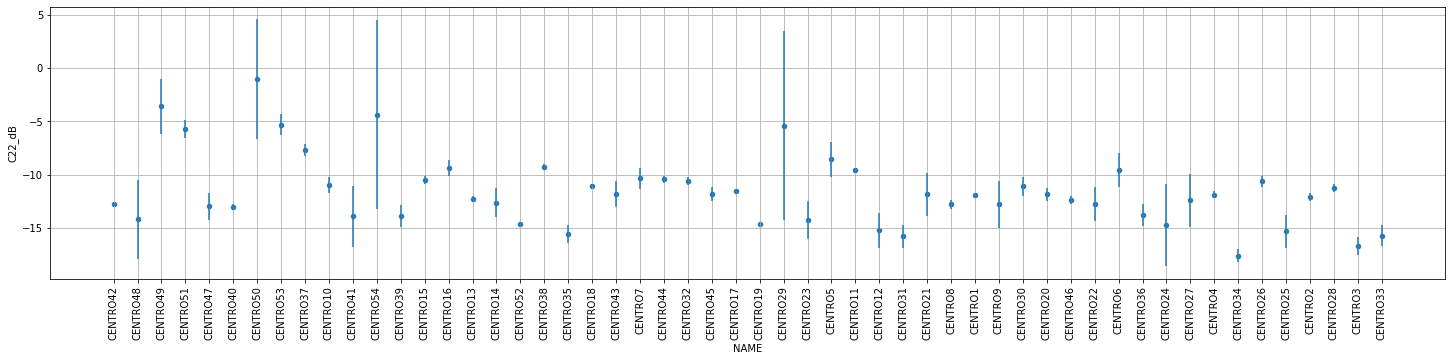

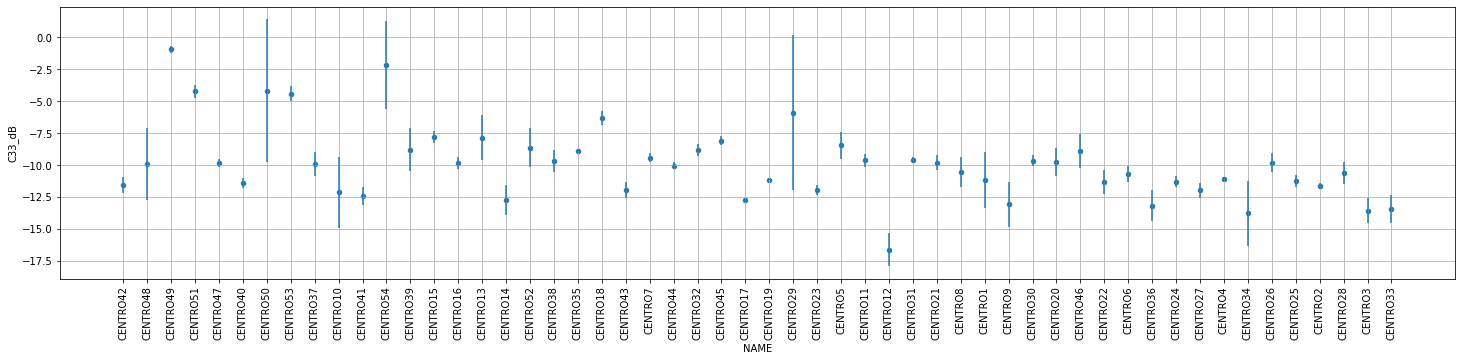

In [34]:
# estudio preliminar Matriz C
ax1 = data_AGB.plot.scatter(x='NAME',y='AGB', figsize=(25,5),rot=90, grid=True) #c='DarkBlue'
ax1 = data_AGB.plot.scatter(x='NAME',y='ang', figsize=(25,5),rot=90, grid=True) #c='DarkBlue'



# ploteo
ax1 = data_AGB.plot.scatter(x='NAME',y='C11_dB', yerr=(C11_yerr_neg, C11_yerr_pos), figsize=(25,5),rot=90, grid=True)
ax1 = data_AGB.plot.scatter(x='NAME',y='C22_dB', yerr=(C22_yerr_neg, C22_yerr_pos), figsize=(25,5),rot=90, grid=True)
ax1 = data_AGB.plot.scatter(x='NAME',y='C33_dB', yerr=(C33_yerr_neg, C33_yerr_pos), figsize=(25,5),rot=90, grid=True)

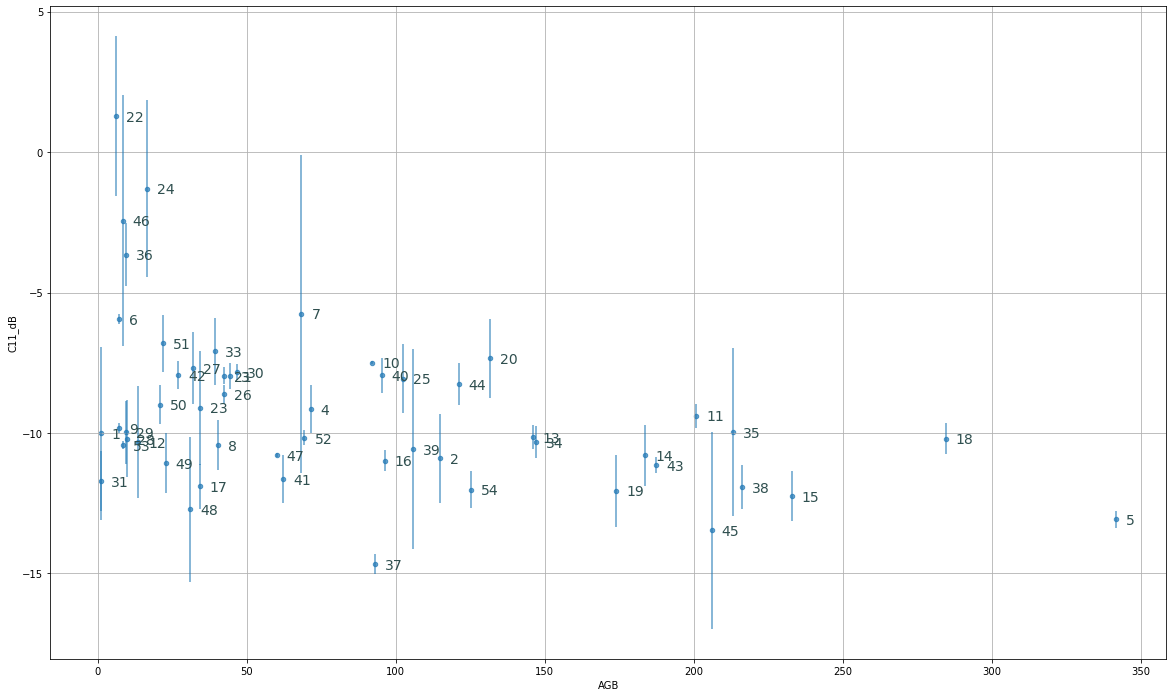

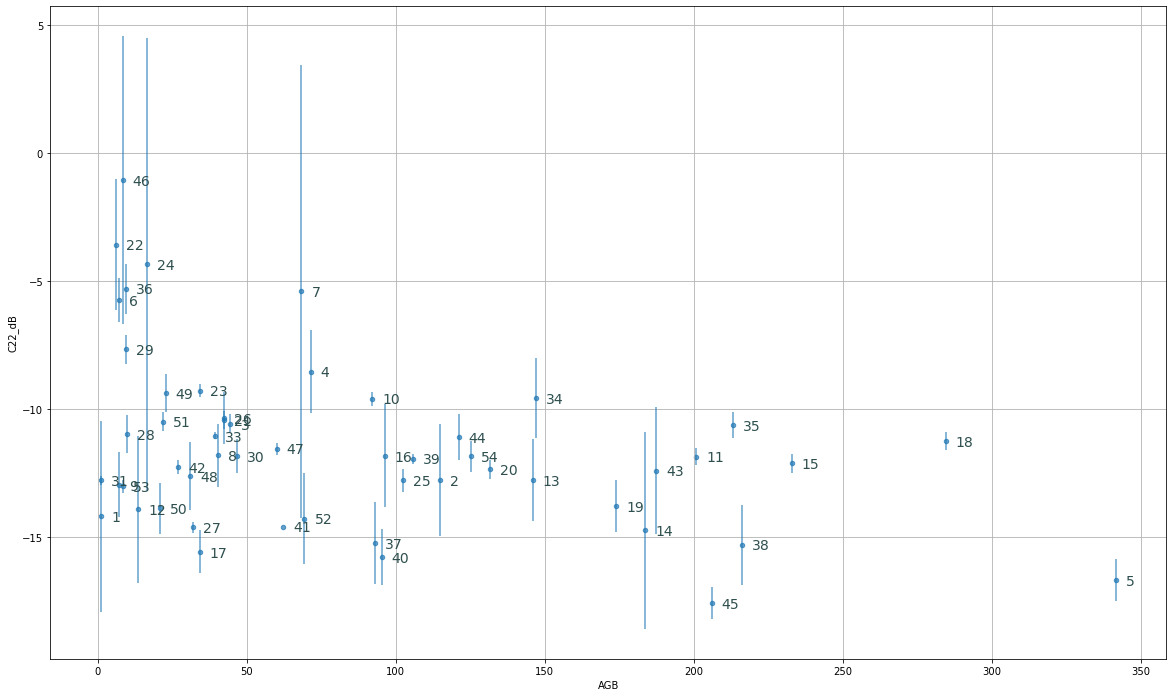

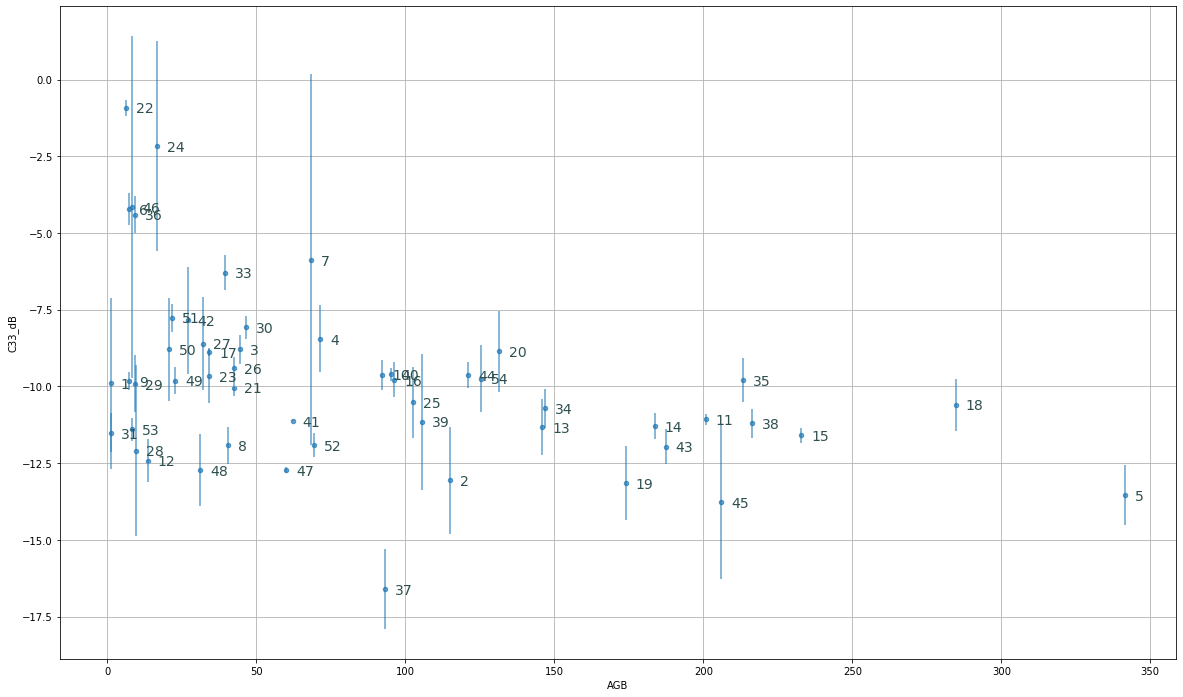

In [35]:
# estudio biomasa

ax = data_AGB.plot.scatter(x='AGB',y='C11_dB', yerr=(C11_yerr_neg, C11_yerr_pos), alpha=0.7, figsize=(20, 12), grid=True)

# Annotate each data point
for i, txt in enumerate(data_AGB.NAME):
   striped = txt.split('O')[1]
   ax.annotate(striped, (data_AGB.AGB[i], data_AGB.C11_dB[i]), xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=14, color='darkslategrey') 

ax = data_AGB.plot.scatter(x='AGB',y='C22_dB', yerr=(C22_yerr_neg, C22_yerr_pos), alpha=0.7, figsize=(20, 12), grid=True)

# Annotate each data point
for i, txt in enumerate(data_AGB.NAME):
   striped = txt.split('O')[1]
   ax.annotate(striped, (data_AGB.AGB[i], data_AGB.C22_dB[i]), xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=14, color='darkslategrey') 

ax = data_AGB.plot.scatter(x='AGB',y='C33_dB', yerr=(C33_yerr_neg, C33_yerr_pos), alpha=0.7, figsize=(20, 12), grid=True)
# Annotate each data point
for i, txt in enumerate(data_AGB.NAME):
   striped = txt.split('O')[1]
   ax.annotate(striped, (data_AGB.AGB[i], data_AGB.C33_dB[i]), xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=14, color='darkslategrey') 

In [ ]:
# estudio altura dominante

# ax1 = data_AGB.plot.scatter(x='ALT_DOM',y='C11_dB', yerr=(C11_yerr_neg, C11_yerr_pos), figsize=(12,8),rot=90, grid=True)
# ax1 = data_AGB.plot.scatter(x='ALT_DOM',y='C22_dB', yerr=(C22_yerr_neg, C22_yerr_pos), figsize=(12,8),rot=90, grid=True)
# ax1 = data_AGB.plot.scatter(x='ALT_DOM',y='C33_dB', yerr=(C33_yerr_neg, C33_yerr_pos), figsize=(12,8),rot=90, grid=True)

In [ ]:
# estudio area basal

ax = data_AGB.plot.scatter(x='AB',y='C11_dB', yerr=(C11_yerr_neg, C11_yerr_pos), figsize=(12,8), grid=True)

# Annotate each data point
for i, txt in enumerate(data_AGB.NAME):
   striped = txt.split('O')[1]
   ax.annotate(striped, (data_AGB.AB[i], data_AGB.C11_dB[i]), xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=14, color='darkslategrey')    


ax = data_AGB.plot.scatter(x='AB',y='C22_dB', yerr=(C22_yerr_neg, C22_yerr_pos), figsize=(12,8), grid=True)
# Annotate each data point
for i, txt in enumerate(data_AGB.NAME):
   striped = txt.split('O')[1]
   ax.annotate(striped, (data_AGB.AB[i], data_AGB.C22_dB[i]), xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=14, color='darkslategrey')  



ax = data_AGB.plot.scatter(x='AB',y='C33_dB', yerr=(C33_yerr_neg, C33_yerr_pos), figsize=(12,8), grid=True)
# Annotate each data point
for i, txt in enumerate(data_AGB.NAME):
   striped = txt.split('O')[1]
   ax.annotate(striped, (data_AGB.AB[i], data_AGB.C33_dB[i]), xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=14, color='darkslategrey')  

In [ ]:
# estudio valores tita>25

data_AGB_slant = data_AGB[data_AGB.ang>25]

In [ ]:
data_AGB_slant.head()

In [ ]:
def estudioMatrizC(df):
    # estudio preliminar Matriz C
    ax1 = df.plot.scatter(x='NAME',y='AGB', figsize=(25,5),rot=90, grid=True) #c='DarkBlue'
    ax1 = df.plot.scatter(x='NAME',y='ang', figsize=(25,5),rot=90, grid=True) #c='DarkBlue'

    # barras de error
    C11_yerr_pos = np.abs(df['C11_dB'] - 10*np.log10(df['C11'] + df['C11_std']))
    C11_yerr_neg = np.abs(df['C11_dB'] - 10*np.log10(df['C11'] - df['C11_std']))

    C22_yerr_pos = np.abs(df['C22_dB'] - 10*np.log10(df['C22'] + df['C22_std']))
    C22_yerr_neg = np.abs(df['C22_dB'] - 10*np.log10(df['C22'] - df['C22_std']))

    C33_yerr_pos = np.abs(df['C33_dB'] - 10*np.log10(df['C33'] + df['C33_std']))
    C33_yerr_neg = np.abs(df['C33_dB'] - 10*np.log10(df['C33'] - df['C33_std']))

    # ploteo
    ax1 = df.plot.scatter(x='NAME',y='C11_dB', yerr=(C11_yerr_neg, C11_yerr_pos), figsize=(25,5),rot=90, grid=True)
    ax1 = df.plot.scatter(x='NAME',y='C22_dB', yerr=(C22_yerr_neg, C22_yerr_pos), figsize=(25,5),rot=90, grid=True)
    ax1 = df.plot.scatter(x='NAME',y='C33_dB', yerr=(C33_yerr_neg, C33_yerr_pos), figsize=(25,5),rot=90, grid=True)

    ###
    ax = df.plot.scatter(x='AGB',y='C11_dB', yerr=(C11_yerr_neg, C11_yerr_pos), alpha=0.7, figsize=(20, 12), grid=True)

    # Annotate each data point
    # for i, txt in enumerate(df.NAME):
    #     striped = txt.split('O')[1]
    #     ax.annotate(striped, (df.AGB[i], df.C11_dB[i]), xytext=(10,-5), textcoords='offset points',
    #                     family='sans-serif', fontsize=14, color='darkslategrey') 

    ax = df.plot.scatter(x='AGB',y='C22_dB', yerr=(C22_yerr_neg, C22_yerr_pos), alpha=0.7, figsize=(20, 12), grid=True)

    # Annotate each data point
    # for i, txt in enumerate(df.NAME):
    #     striped = txt.split('O')[1]
    #     ax.annotate(striped, (df.AGB[i], df.C22_dB[i]), xytext=(10,-5), textcoords='offset points',
    #                     family='sans-serif', fontsize=14, color='darkslategrey') 

    ax = df.plot.scatter(x='AGB',y='C33_dB', yerr=(C33_yerr_neg, C33_yerr_pos), alpha=0.7, figsize=(20, 12), grid=True)
    # Annotate each data point
    # for i, txt in enumerate(df.NAME):
    #     striped = txt.split('O')[1]
    #     ax.annotate(striped, (df.AGB[i], df.C33_dB[i]), xytext=(10,-5), textcoords='offset points',
    #                     family='sans-serif', fontsize=14, color='darkslategrey') 

In [ ]:
estudioMatrizC(data_AGB_slant)

In [ ]:
# estudio biomasa tita>25

def plotBiomasa(df):
    # barras de error
    C11_yerr_pos = np.abs(df['C11_dB'] - 10*np.log10(df['C11'] + df['C11_std']))
    C11_yerr_neg = np.abs(df['C11_dB'] - 10*np.log10(df['C11'] - df['C11_std']))

    C22_yerr_pos = np.abs(df['C22_dB'] - 10*np.log10(df['C22'] + df['C22_std']))
    C22_yerr_neg = np.abs(df['C22_dB'] - 10*np.log10(df['C22'] - df['C22_std']))

    C33_yerr_pos = np.abs(df['C33_dB'] - 10*np.log10(df['C33'] + df['C33_std']))
    C33_yerr_neg = np.abs(df['C33_dB'] - 10*np.log10(df['C33'] - df['C33_std']))
    
    ax = df.plot.scatter(x='AGB',y='C11_dB', yerr=(C11_yerr_neg, C11_yerr_pos), alpha=0.7, figsize=(20, 12), grid=True)

    # Annotate each data point
    for i, txt in enumerate(df.NAME):
        # pass
        striped = txt.split('O')[1]
        ax.annotate(striped, (df.AGB[i], df.C11_dB[i]), xytext=(10,-5), textcoords='offset points',
                        family='sans-serif', fontsize=14, color='darkslategrey') 

    ax = df.plot.scatter(x='AGB',y='C22_dB', yerr=(C22_yerr_neg, C22_yerr_pos), alpha=0.7, figsize=(20, 12), grid=True)

    # Annotate each data point
    # for i, txt in enumerate(df.NAME):
    #     striped = txt.split('O')[1]
    #     ax.annotate(striped, (df.AGB[i], df.C22_dB[i]), xytext=(10,-5), textcoords='offset points',
    #                     family='sans-serif', fontsize=14, color='darkslategrey') 

    ax = df.plot.scatter(x='AGB',y='C33_dB', yerr=(C33_yerr_neg, C33_yerr_pos), alpha=0.7, figsize=(20, 12), grid=True)
    # # Annotate each data point
    # for i, txt in enumerate(df.NAME):
    #     striped = txt.split('O')[1]
    #     ax.annotate(striped, (df.AGB[i], df.C33_dB[i]), xytext=(10,-5), textcoords='offset points',
    #                     family='sans-serif', fontsize=14, color='darkslategrey') 

In [ ]:
# plotBiomasa(data_AGB_slant)

In [18]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

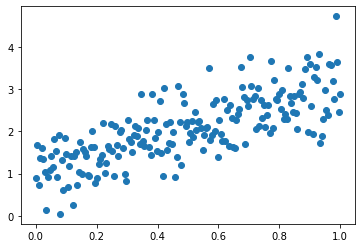

In [19]:
plt.scatter(x, y)

In [28]:
# prueba inferencia
# import pymc as pm

y = data_AGB.AGB.values
x = data_AGB.C11_dB.values

with pm.Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    # sigma = pm.HalfCauchy("sigma", beta=10) #testval=1.0
    sigmaObs = pm.HalfNormal('sd', sigma=10)
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    x_coeff = pm.Normal("x", mu=0, sigma=10)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + x_coeff * x, sigma=sigmaObs, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    # trace = pm.sample(3000, return_inferencedata=True)
    trace = pm.sample(3000)



/home/fran/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/model.py:1755: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/tmp/ipykernel_15593/2489265448.py:20: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(3000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_missing, x, Intercept, sd]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 7 seconds.


In [29]:
# plt.scatter(x,y)

/home/fran/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


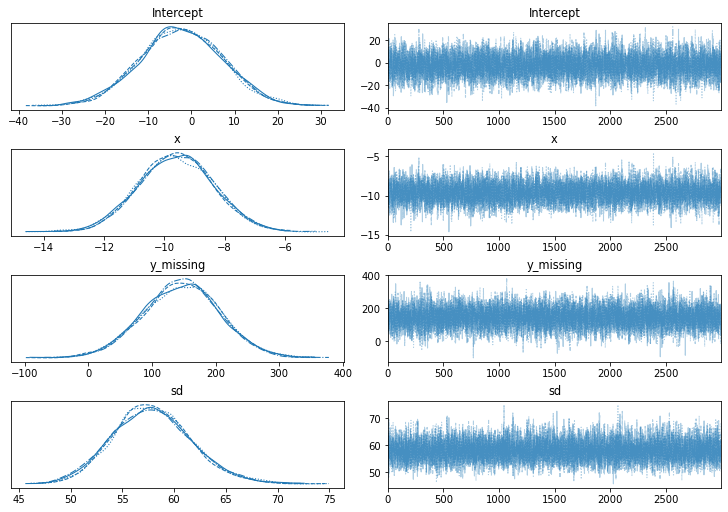

In [30]:
import arviz as az
az.plot_trace(trace, figsize=(10, 7));

/home/fran/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


Text(0, 0.5, 'y')

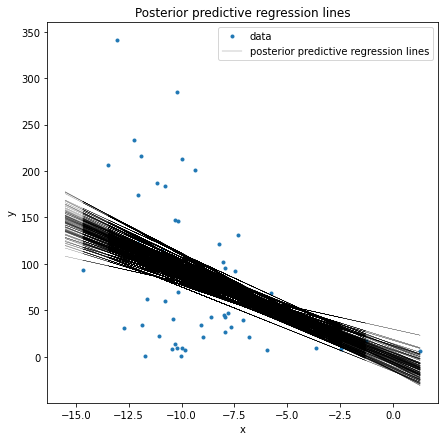

In [33]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, ".", label="data")
pm.plot_posterior_predictive_glm(trace, eval=x, samples=100, label="posterior predictive regression lines")
# plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y")

In [36]:
# regresion multiple

# prueba inferencia
# import pymc as pm

y = data_AGB.AGB.values
x0 = data_AGB.C11_dB.values
x1 = data_AGB.C22_dB.values
x2 = data_AGB.C33_dB.values

with pm.Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    # sigma = pm.HalfCauchy("sigma", beta=10) #testval=1.0
    sigmaObs = pm.HalfNormal('sd', sigma=10)
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    x0_slope = pm.Normal("x0_slope", mu=0, sigma=10)
    x1_slope = pm.Normal("x1_slope", mu=0, sigma=10)
    x2_slope = pm.Normal("x2_slope", mu=0, sigma=10)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + x0_slope * x0 + x1_slope * x1 + x2_slope * x2, sigma=sigmaObs, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    # trace = pm.sample(3000, return_inferencedata=True)
    trace = pm.sample(3000)

/home/fran/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/model.py:1755: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/tmp/ipykernel_15593/1214795531.py:26: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(3000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_missing, x2_slope, x1_slope, x0_slope, Intercept, sd]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 22 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.


/home/fran/miniconda3/envs/bayes/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


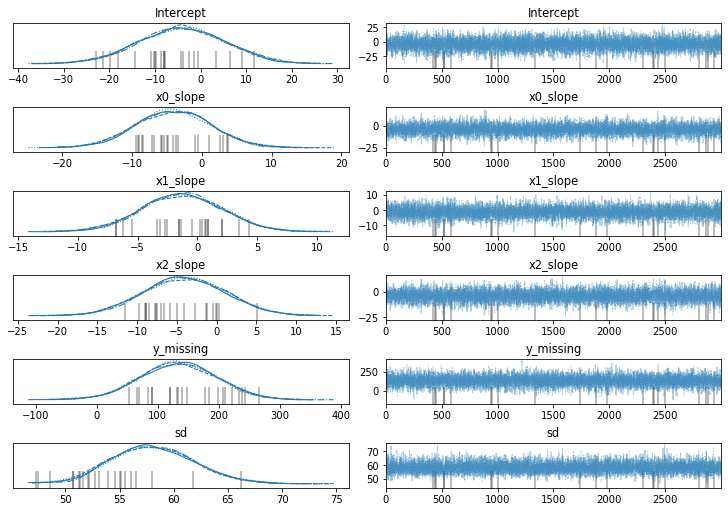

In [37]:
az.plot_trace(trace, figsize=(10, 7));

/home/fran/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


KeyError: 'x'

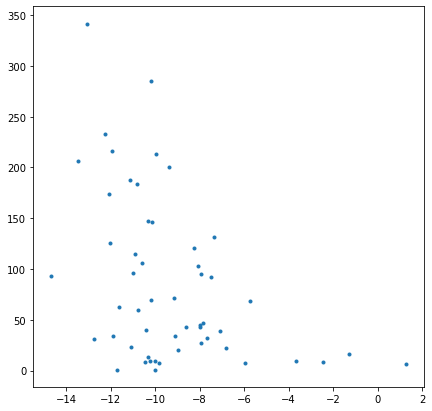

In [39]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, ".", label="data")
pm.plot_posterior_predictive_glm(trace, eval=x0, samples=100, label="posterior predictive regression lines")
# plt.plot(x, true_regression_line, label="true regression line", lw=3.0, c="y")

plt.title("Posterior predictive regression lines")
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y")